<a href="https://colab.research.google.com/github/ViniciusBortolini/TCC/blob/main/TCC_PROTOTIPO_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Montando Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2 Importando Dataset

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
data6 = pd.read_csv("/content/drive/MyDrive/TCC/TESTE/UnificadoDataSet7dias.csv", sep=',')
data6 = data6[['ID_PACIENTE','DT_COLETA',
'PCR em tempo real para detecção de Coron/Resultado COVID-19:',
'Hemograma com Plaquetas/Hematócrito',
'Hemograma com Plaquetas/Hemoglobina',
'Hemograma com Plaquetas/Hemácias',
'Hemograma com Plaquetas/Leucócitos',
'Hemograma com Plaquetas/Leucócitos #',
'Hemograma com Plaquetas/Plaquetas',
'Hemograma com Plaquetas/VCM',
'Hemograma com Plaquetas/CHCM',
'Hemograma com Plaquetas/HCM',
'Hemograma com Plaquetas/RDW',
'Hemograma com Plaquetas/Volume Médio Plaquetário',
'Hemograma Contagem Auto/Basófilos',
'Hemograma Contagem Auto/Eosinófilos',
'Hemograma Contagem Auto/Eosinófilos  #',
'Hemograma Contagem Auto/Linfócitos',
'Hemograma Contagem Auto/Linfócitos #',
'Hemograma Contagem Auto/Monócitos',
'Hemograma Contagem Auto/Monócitos #',
'Hemograma Contagem Auto/Neutrófilos',
'Hemograma Contagem Auto/Neutrófilos  #',
'Hemograma Contagem Auto/Basófilos #',
#'Dosagem de Uréia/Uréia',# afeta em apenas 1530 registro
'Dosagem de CreatiNINA/Creatinina', #afetou em 2793
'Dosagem de TGP/TGP',# afetou em 2980
'Dosagem de TGO/TGO',# afetou em 2975
#'Dosagem de Potássio/Potássio', #afetou em 3285
#'Dosagem de Sódio/Sódio', #afetou em 3290
#'Dosagem de Glicose/Dosagem de Glicose',# afeta em 6228
#'Dosagem de Gama GT/Gama GT', #afeta em 4265
#'Dosagem de Fosfatase Alcalina/Fosfatase Alcalina' #afeta 4452
]]
dfFinal = data6.copy()

In [ ]:
dfFinal.set_index(['ID_PACIENTE', 'DT_COLETA'], inplace= True)
dfFinal.dropna(inplace= True)
dfFinal.shape

(3788, 25)

In [ ]:
TotalX = dfFinal[['Hemograma com Plaquetas/Hematócrito',
'Hemograma com Plaquetas/Hemoglobina',
'Hemograma com Plaquetas/Hemácias',
'Hemograma com Plaquetas/Leucócitos',
'Hemograma com Plaquetas/Leucócitos #',
'Hemograma com Plaquetas/Plaquetas',
'Hemograma com Plaquetas/VCM',
'Hemograma com Plaquetas/CHCM',
'Hemograma com Plaquetas/HCM',
'Hemograma com Plaquetas/RDW',
'Hemograma com Plaquetas/Volume Médio Plaquetário',
'Hemograma Contagem Auto/Basófilos',
'Hemograma Contagem Auto/Eosinófilos',
'Hemograma Contagem Auto/Eosinófilos  #',
'Hemograma Contagem Auto/Linfócitos',
'Hemograma Contagem Auto/Linfócitos #',
'Hemograma Contagem Auto/Monócitos',
'Hemograma Contagem Auto/Monócitos #',
'Hemograma Contagem Auto/Neutrófilos',
'Hemograma Contagem Auto/Neutrófilos  #',
'Hemograma Contagem Auto/Basófilos #',
#'Dosagem de Uréia/Uréia',# afeta em apenas 1530 registro
'Dosagem de CreatiNINA/Creatinina', #afetou em 2793
'Dosagem de TGP/TGP',# afetou em 2980
'Dosagem de TGO/TGO',# afetou em 2975
#'Dosagem de Potássio/Potássio', #afetou em 3285
#'Dosagem de Sódio/Sódio', #afetou em 3290
#'Dosagem de Glicose/Dosagem de Glicose',# afeta em 6228
#'Dosagem de Gama GT/Gama GT', #afeta em 4265
#'Dosagem de Fosfatase Alcalina/Fosfatase Alcalina' #afeta 4452
]].values 
TotalY = dfFinal['PCR em tempo real para detecção de Coron/Resultado COVID-19:'].values


#3 Aplicando Undersampling

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler 
from collections import Counter
import numpy as np


#smt = SMOTE(k_neighbors=5, random_state=42)
smt = RandomUnderSampler(sampling_strategy='auto')
Xtreino, ytreino = smt.fit_sample(TotalX, TotalY)

Counter(ytreino)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0.0: 1447, 1.0: 1447})

# 4 Montando o Dataset após o Undersampling

In [ ]:
df_smote = pd.DataFrame(Xtreino)

df_smote = df_smote.rename(columns ={
0:'Hemograma com Plaquetas/Hematócrito',
1:'Hemograma com Plaquetas/Hemoglobina',
2:'Hemograma com Plaquetas/Hemácias',
3:'Hemograma com Plaquetas/Leucócitos',
4:'Hemograma com Plaquetas/Leucócitos #',
5:'Hemograma com Plaquetas/Plaquetas',
6:'Hemograma com Plaquetas/VCM',
7:'Hemograma com Plaquetas/CHCM',
8:'Hemograma com Plaquetas/HCM',
9:'Hemograma com Plaquetas/RDW',
10:'Hemograma com Plaquetas/Volume Médio Plaquetário',
11:'Hemograma Contagem Auto/Basófilos',
12:'Hemograma Contagem Auto/Eosinófilos',
13:'Hemograma Contagem Auto/Eosinófilos  #',
14:'Hemograma Contagem Auto/Linfócitos',
15:'Hemograma Contagem Auto/Linfócitos #',
16:'Hemograma Contagem Auto/Monócitos',
17:'Hemograma Contagem Auto/Monócitos #',
18:'Hemograma Contagem Auto/Neutrófilos',
19:'Hemograma Contagem Auto/Neutrófilos  #',
20:'Hemograma Contagem Auto/Basófilos #',
#'Dosagem de Uréia/Uréia',# afeta em apenas 1530 registro
21:'Dosagem de CreatiNINA/Creatinina', #afetou em 2793
22:'Dosagem de TGP/TGP',# afetou em 2980
23:'Dosagem de TGO/TGO',# afetou em 2975
#'Dosagem de Potássio/Potássio', #afetou em 3285
#'Dosagem de Sódio/Sódio', #afetou em 3290
#'Dosagem de Glicose/Dosagem de Glicose',# afeta em 6228
#'Dosagem de Gama GT/Gama GT', #afeta em 4265
#'Dosagem de Fosfatase Alcalina/Fosfatase Alcalina' #afeta 4452
})

df_smote = df_smote.assign(PCR =  pd.DataFrame(ytreino))
df_smote = df_smote.rename(columns ={
'PCR':'PCR em tempo real para detecção de Coron/Resultado COVID-19:'})
df_smote.head()

,Hemograma com Plaquetas/Hematócrito,Hemograma com Plaquetas/Hemoglobina,Hemograma com Plaquetas/Hemácias,Hemograma com Plaquetas/Leucócitos,Hemograma com Plaquetas/Leucócitos #,Hemograma com Plaquetas/Plaquetas,Hemograma com Plaquetas/VCM,Hemograma com Plaquetas/CHCM,Hemograma com Plaquetas/HCM,Hemograma com Plaquetas/RDW,Hemograma com Plaquetas/Volume Médio Plaquetário,Hemograma Contagem Auto/Basófilos,Hemograma Contagem Auto/Eosinófilos,Hemograma Contagem Auto/Eosinófilos #,Hemograma Contagem Auto/Linfócitos,Hemograma Contagem Auto/Linfócitos #,Hemograma Contagem Auto/Monócitos,Hemograma Contagem Auto/Monócitos #,Hemograma Contagem Auto/Neutrófilos,Hemograma Contagem Auto/Neutrófilos #,Hemograma Contagem Auto/Basófilos #,Dosagem de CreatiNINA/Creatinina,Dosagem de TGP/TGP,Dosagem de TGO/TGO,PCR em tempo real para detecção de Coron/Resultado COVID-19:
0,41.400002,14.1,4.51,13.30,13300.0,240.0,91.800003,34.099998,31.299999,13.9,9.7,0.5,2.0,266.0,26.000000,3458.0,6.4,851.0,65.099998,8658.0,66.0,0.65,30.0,16.0,0.0
1,45.900002,15.8,5.21,4.75,4750.0,201.0,88.099998,34.400002,30.299999,12.4,9.0,0.8,2.3,109.0,38.299999,1819.0,9.7,461.0,48.900002,2323.0,38.0,0.91,16.0,20.0,0.0
2,32.900002,11.1,4.62,4.50,4500.0,248.0,71.199997,33.700001,24.000000,16.6,10.5,0.7,0.7,32.0,27.600000,1242.0,6.4,288.0,64.599998,2907.0,32.0,0.77,15.0,21.0,0.0
3,44.599998,15.8,4.97,6.76,6760.0,247.0,89.699997,35.400002,31.799999,11.9,9.3,0.7,1.5,101.0,31.500000,2129.0,7.2,487.0,59.099998,3995.0,47.0,1.30,12.0,20.0,0.0
4,35.400002,12.6,3.94,6.59,6590.0,184.0,89.800003,35.599998,32.000000,12.8,9.9,0.2,0.2,13.0,18.700001,1232.0,7.7,507.0,73.199997,4824.0,13.0,0.61,855.0,511.0,0.0


In [ ]:
df_smote.shape


(2894, 25)

In [ ]:
dfFinal2 = dfFinal.copy()
dfFinal2 = dfFinal2[[
'PCR em tempo real para detecção de Coron/Resultado COVID-19:',
'Hemograma com Plaquetas/Hematócrito',
'Hemograma com Plaquetas/Hemoglobina',
'Hemograma com Plaquetas/Hemácias',
'Hemograma com Plaquetas/Leucócitos',
'Hemograma com Plaquetas/Leucócitos #',
'Hemograma com Plaquetas/Plaquetas',
'Hemograma com Plaquetas/VCM',
'Hemograma com Plaquetas/CHCM',
'Hemograma com Plaquetas/HCM',
'Hemograma com Plaquetas/RDW',
'Hemograma com Plaquetas/Volume Médio Plaquetário',
'Hemograma Contagem Auto/Basófilos',
'Hemograma Contagem Auto/Eosinófilos',
'Hemograma Contagem Auto/Eosinófilos  #',
'Hemograma Contagem Auto/Linfócitos',
'Hemograma Contagem Auto/Linfócitos #',
'Hemograma Contagem Auto/Monócitos',
'Hemograma Contagem Auto/Monócitos #',
'Hemograma Contagem Auto/Neutrófilos',
'Hemograma Contagem Auto/Neutrófilos  #',
'Hemograma Contagem Auto/Basófilos #',
#'Dosagem de Uréia/Uréia',# afeta em apenas 1530 registro
'Dosagem de CreatiNINA/Creatinina', #afetou em 2793
'Dosagem de TGP/TGP',# afetou em 2980
'Dosagem de TGO/TGO',# afetou em 2975
#'Dosagem de Potássio/Potássio', #afetou em 3285
#'Dosagem de Sódio/Sódio', #afetou em 3290
#'Dosagem de Glicose/Dosagem de Glicose',# afeta em 6228
#'Dosagem de Gama GT/Gama GT', #afeta em 4265
#'Dosagem de Fosfatase Alcalina/Fosfatase Alcalina' #afeta 4452
]]
dfFinal = dfFinal2.copy()

dfFinal2 = dfFinal.copy()
dfFinal2 = dfFinal2[[
'PCR em tempo real para detecção de Coron/Resultado COVID-19:'
]]
yy = dfFinal2.copy()

dfFinal2 = dfFinal.copy()
dfFinal2 = dfFinal2[[
#'PCR em tempo real para detecção de Coron/Resultado COVID-19:',
'Hemograma com Plaquetas/Hematócrito',
'Hemograma com Plaquetas/Hemoglobina',
'Hemograma com Plaquetas/Hemácias',
'Hemograma com Plaquetas/Leucócitos',
'Hemograma com Plaquetas/Leucócitos #',
'Hemograma com Plaquetas/Plaquetas',
'Hemograma com Plaquetas/VCM',
'Hemograma com Plaquetas/CHCM',
'Hemograma com Plaquetas/HCM',
'Hemograma com Plaquetas/RDW',
'Hemograma com Plaquetas/Volume Médio Plaquetário',
'Hemograma Contagem Auto/Basófilos',
'Hemograma Contagem Auto/Eosinófilos',
'Hemograma Contagem Auto/Eosinófilos  #',
'Hemograma Contagem Auto/Linfócitos',
'Hemograma Contagem Auto/Linfócitos #',
'Hemograma Contagem Auto/Monócitos',
'Hemograma Contagem Auto/Monócitos #',
'Hemograma Contagem Auto/Neutrófilos',
'Hemograma Contagem Auto/Neutrófilos  #',
'Hemograma Contagem Auto/Basófilos #',
#'Dosagem de Uréia/Uréia',# afeta em apenas 1530 registro
'Dosagem de CreatiNINA/Creatinina', #afetou em 2793
'Dosagem de TGP/TGP',# afetou em 2980
'Dosagem de TGO/TGO',# afetou em 2975
#'Dosagem de Potássio/Potássio', #afetou em 3285
#'Dosagem de Sódio/Sódio', #afetou em 3290
#'Dosagem de Glicose/Dosagem de Glicose',# afeta em 6228
#'Dosagem de Gama GT/Gama GT', #afeta em 4265
#'Dosagem de Fosfatase Alcalina/Fosfatase Alcalina' #afeta 4452
]]
dfFinal = dfFinal2.copy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score # curva de probabilidade que traça o verdadeiro positivo contra o FPR
from sklearn.model_selection import train_test_split
#quanto mais alto o roc melhor é
from scipy.stats import ks_2samp

def treino_resultado(model):
    model.fit(Xtreino, ytreino)  
    y_pred = model.predict(dfFinal)
    #Matriz Confusão e Métricas de Classificacao
    print("Matriz Confusão: \n", confusion_matrix(yy, y_pred))  
    print("Métricas de Classficação: \n", classification_report(yy, y_pred))  
    print("Acurácia: ", accuracy_score(yy, y_pred))   
    print("Revocação:", recall_score(yy, y_pred))
    #AUC e KS
    #print("AUC: ", roc_auc_score(yy, y_pred))
    #print("KS: ", ks_2samp(y_pred[yy == 0], y_pred[yy == 1]).statistic)
    
X = df_smote[['Hemograma com Plaquetas/Hematócrito',
'Hemograma com Plaquetas/Hemoglobina',
'Hemograma com Plaquetas/Hemácias',
'Hemograma com Plaquetas/Leucócitos',
'Hemograma com Plaquetas/Leucócitos #',
'Hemograma com Plaquetas/Plaquetas',
'Hemograma com Plaquetas/VCM',
'Hemograma com Plaquetas/CHCM',
'Hemograma com Plaquetas/HCM',
'Hemograma com Plaquetas/RDW',
'Hemograma com Plaquetas/Volume Médio Plaquetário',
'Hemograma Contagem Auto/Basófilos',
'Hemograma Contagem Auto/Eosinófilos',
'Hemograma Contagem Auto/Eosinófilos  #',
'Hemograma Contagem Auto/Linfócitos',
'Hemograma Contagem Auto/Linfócitos #',
'Hemograma Contagem Auto/Monócitos',
'Hemograma Contagem Auto/Monócitos #',
'Hemograma Contagem Auto/Neutrófilos',
'Hemograma Contagem Auto/Neutrófilos  #',
'Hemograma Contagem Auto/Basófilos #',
#'Dosagem de Uréia/Uréia',# afeta em apenas 1530 registro
'Dosagem de CreatiNINA/Creatinina', #afetou em 2793
'Dosagem de TGP/TGP',# afetou em 2980
'Dosagem de TGO/TGO',# afetou em 2975
#'Dosagem de Potássio/Potássio', #afetou em 3285
#'Dosagem de Sódio/Sódio', #afetou em 3290
#'Dosagem de Glicose/Dosagem de Glicose',# afeta em 6228
#'Dosagem de Gama GT/Gama GT', #afeta em 4265
#'Dosagem de Fosfatase Alcalina/Fosfatase Alcalina' #afeta 4452
]].values 
y = df_smote['PCR em tempo real para detecção de Coron/Resultado COVID-19:'].values
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
print("Resultados!")

#Aplicando KNN
#k = 73
#knn = KNeighborsClassifier(n_neighbors=k)
#treino_resultado(knn)

rf = RandomForestClassifier(n_estimators=100, max_features='auto', random_state=42)  


treino_resultado(rf)

Resultados!
Matriz Confusão: 
 [[2062  279]
 [ 105 1342]]
Métricas de Classficação: 
               precision    recall  f1-score   support

         0.0       0.95      0.88      0.91      2341
         1.0       0.83      0.93      0.87      1447

    accuracy                           0.90      3788
   macro avg       0.89      0.90      0.89      3788
weighted avg       0.90      0.90      0.90      3788

Acurácia:  0.8986272439281943
Revocação: 0.9274360746371804


# Aplicando KNN


In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV

X = Xtreino
y = ytreino
from sklearn.svm import SVC
mv = make_pipeline(StandardScaler(), SVC(gamma='auto'))

#clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel="linear"))
#clf = RFECV(clf, step=1, cv=5)
#clf.fit(X, y)
#estimator = SVC(kernel="linear")
#selector = RFECV(estimator, step=1, cv=5)
#selector = selector.fit(X, y)
#clf = selector

print("Resultados Máquina Vetores de Suporte!")
treino_resultado2(mv)


#print(clf.score(Xteste, yteste))

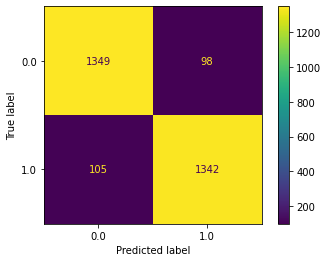

In [ ]:
#NAO PRECISA MAIS EXECUTAR
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf, X, y, values_format="d")

'Hemograma com Plaquetas/CHCM',
'Hemograma com Plaquetas/Hematócrito',
'Hemograma com Plaquetas/Hemácias',
'Hemograma com Plaquetas/Plaquetas',
'Hemograma com Plaquetas/VCM',
'Hemograma com Plaquetas/HCM',
'Hemograma com Plaquetas/Hemoglobina',
'Hemograma com Plaquetas/Leucócitos',
'Hemograma com Plaquetas/Leucócitos #',
'Hemograma com Plaquetas/RDW',
'Hemograma com Plaquetas/Volume Médio Plaquetário',
'Dosagem de Uréia/Uréia',
'Hemograma Contagem Auto/Linfócitos',
'Hemograma Contagem Auto/Basófilos',
'Hemograma Contagem Auto/Basófilos #', 
'Hemograma Contagem Auto/Eosinófilos'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_

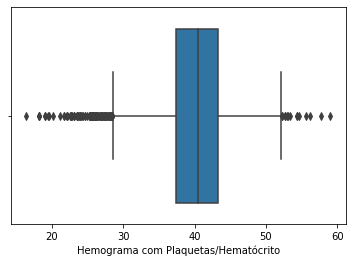

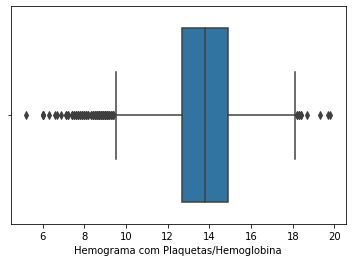

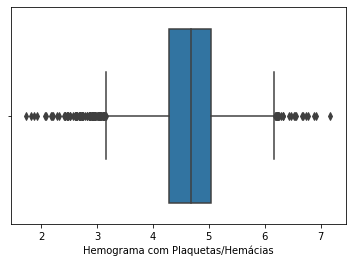

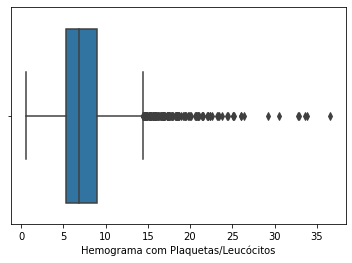

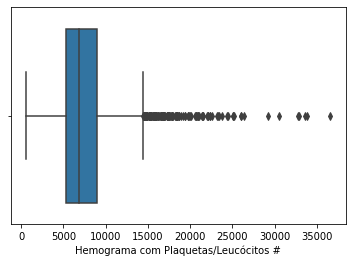

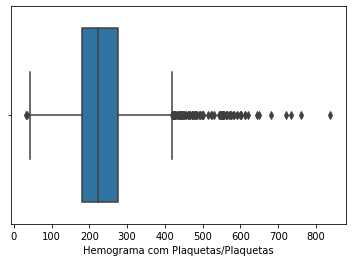

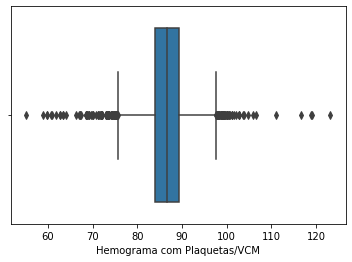

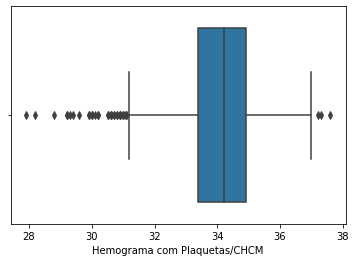

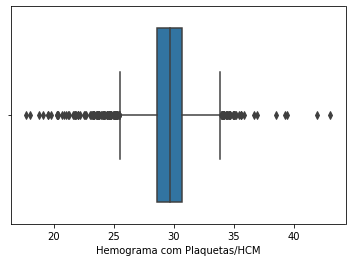

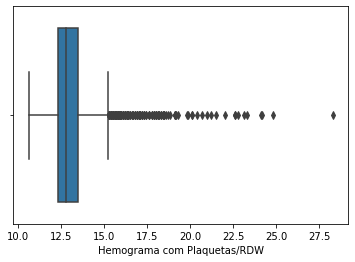

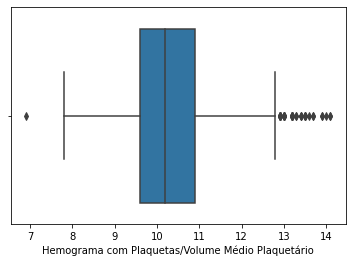

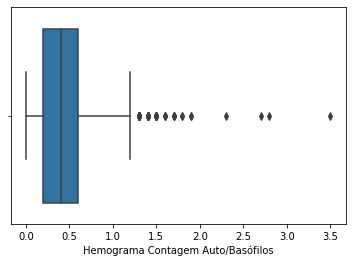

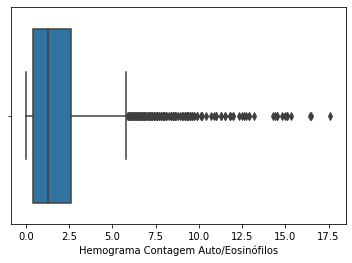

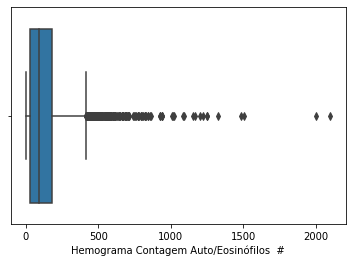

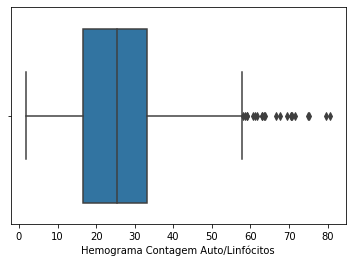

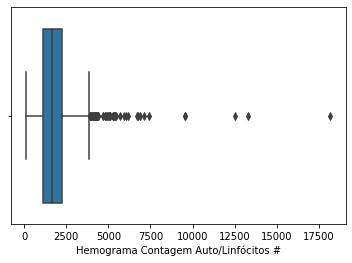

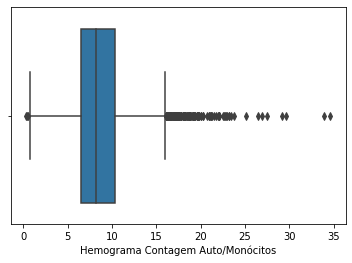

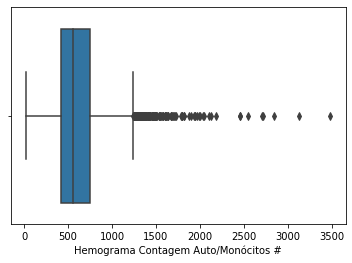

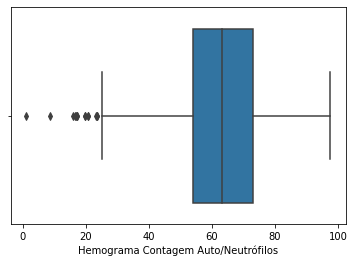

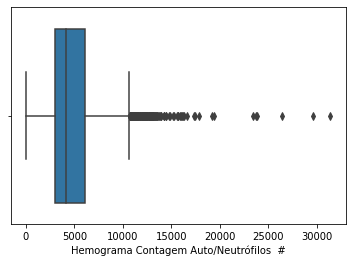

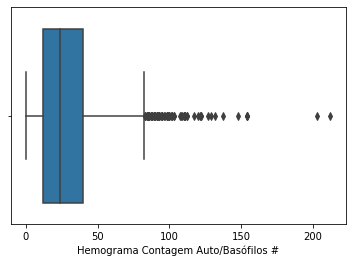

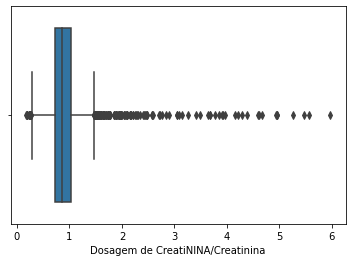

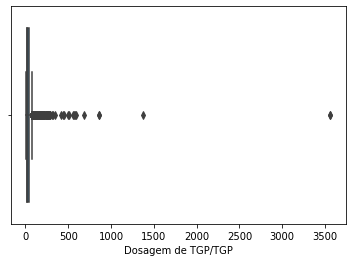

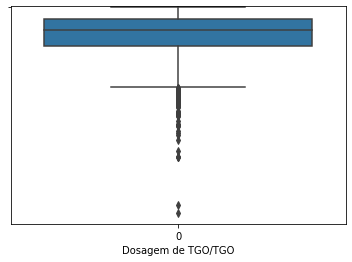

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for coluna in dfFinal.columns:
    plt.figure()
    sns.boxplot(data=dfFinal, x=coluna)

#sns.boxplot(data=dfFinal["Hemograma com Plaquetas/Hemácias"]) #4 a 6
#sns.boxplot(data=dfFinal["Hemograma com Plaquetas/CHCM"])
#sns.boxplot(data=dfFinal["Hemograma com Plaquetas/Hematócrito"])
#sns.boxplot(data=dfFinal["Hemograma com Plaquetas/Hemácias"])
#sns.boxplot(data=dfFinal["Hemograma com Plaquetas/Plaquetas"])
#sns.boxplot(data=dfFinal["Hemograma com Plaquetas/VCM"])
#sns.boxplot(data=dfFinal["Hemograma com Plaquetas/HCM"])
#sns.boxplot(data=dfFinal["Hemograma com Plaquetas/Hemoglobina"])
#sns.boxplot(data=dfFinal["Hemograma com Plaquetas/Leucócitos"])
#sns.boxplot(data=dfFinal["Hemograma com Plaquetas/Leucócitos #"])
#sns.boxplot(data=dfFinal["Hemograma com Plaquetas/RDW"])
#sns.boxplot(data=dfFinal["Hemograma com Plaquetas/Volume Médio Plaquetário"])
#sns.boxplot(data=dfFinal["Dosagem de Uréia/Uréia"])
#sns.boxplot(data=dfFinal["Hemograma Contagem Auto/Linfócitos"])
#sns.boxplot(data=dfFinal["Hemograma Contagem Auto/Basófilos"])
sns.boxplot(data=dfFinal["Hemograma Contagem Auto/Basófilos #"])
#sns.boxplot(data=dfFinal["Hemograma Contagem Auto/Eosinófilos"]) #0,1 a 7

# 5 Importar pickle, ele é o responsável por salvar o modelo

In [ ]:
import pickle

In [ ]:
!pip install ipykernel>=5.1.2
!pip install pydeck

     |████████████████████████████████| 4.3 MB 5.1 MB/s 
     |████████████████████████████████| 125 kB 56.2 MB/s 
     |████████████████████████████████| 790 kB 48.7 MB/s 
     |████████████████████████████████| 374 kB 28.1 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-too

# 6 Instalar Streamlit e PyNgrok

In [ ]:
!pip install streamlit
!pip install pyngrok

     |████████████████████████████████| 9.1 MB 5.1 MB/s 
     |████████████████████████████████| 180 kB 69.1 MB/s 
     |████████████████████████████████| 76 kB 5.1 MB/s 
     |████████████████████████████████| 178 kB 54.0 MB/s 
     |████████████████████████████████| 111 kB 48.5 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Created wheel for pympler: filename=Pympler-0.9-py3-none-any.whl size=164824 sha256=029f884f24223b1c8139fabda481d08d5a280e219277418115302c1e84f6de00
  Stored in directory: /root/.cache/pip/wheels/1a/f3/d8/35d5614ea4ddd295ffb9372a5f2f9570d9593d1ea4be33ec6d
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=95f47e09a4aed302caa969106f02ef68a3c36600a5daea6edc476f6f6a5904ab
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
Successfully built pympler blinker
     |████████████████████████████████| 745 kB 5.2 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.

#7 Gerar o Pickle

In [ ]:
arquivo = open("dump.pkl", "wb")
pickle.dump([rf,], arquivo)
#0 é o modelo e na posição 1 é o StandScaler
arquivo.close()


#8 Criar Arquivo

In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

st.write("# Digite os resultados dos exames:")

#teste = st.sidebar.slider('teste', 3.4, 38.1)
Hemograma_com_Plaquetas_CHCM = st.number_input("Hemograma com Plaquetas_CHCM", 20.0, 40.0, format = "%f", step = 0.01)
Hemograma_com_Plaquetas_Hematócrito = st.number_input("Hemograma com Plaquetas_Hematócrito", 10.0, 65.0, format = "%f", step = 0.01)
Hemograma_com_Plaquetas_Hemácias = st.number_input("Hemograma com Plaquetas_Hemácias", 0.0, 10.0, format = "%f", step = 0.01)
Hemograma_com_Plaquetas_Plaquetas = st.number_input("Hemograma com Plaquetas_Plaquetas", 0.0 , 1000.0, format = "%f", step = 0.01)
Hemograma_com_Plaquetas_VCM = st.number_input("Hemograma com Plaquetas_VCM", 50.0 , 130.0, format = "%f", step = 0.01)
Hemograma_com_Plaquetas_HCM = st.number_input("Hemograma com Plaquetas_HCM", 10.0 , 50.0, format = "%f", step = 0.01)
Hemograma_com_Plaquetas_Hemoglobina = st.number_input("Hemograma com Plaquetas_Hemoglobina", 0.0 , 25.0, format = "%f", step = 0.01)
Hemograma_com_Plaquetas_Leucócitos = st.number_input("Hemograma com Plaquetas_Leucócitos", 0.0 , 50.0, format = "%f", step = 0.01)
Hemograma_com_Plaquetas_Leucócitos_percentual = st.number_input("Hemograma com Plaquetas_Leucócitos #", 0.0 , 40000.0, format = "%f", step = 0.01)
Hemograma_com_Plaquetas_RDW = st.number_input("Hemograma com Plaquetas_RDW", 10.0 , 30.0, format = "%f", step = 0.01)
Hemograma_com_Plaquetas_Volume_Médio_Plaquetário = st.number_input("Hemograma com Plaquetas_Volume Médio Plaquetário", 5.0 , 17.0, format = "%f", step = 0.01)
Hemograma_Contagem_Auto_Linfócitos = st.number_input("Hemograma Contagem Auto_Linfócitos", 0.0 , 90.0, format = "%f", step = 0.01)
Hemograma_Contagem_Auto_Linfócitos_percentual = st.number_input("Hemograma Contagem Auto Linfócitos #", 0.0 , 23.0, format = "%f", step = 0.01)
Hemograma_Contagem_Auto_Basófilos = st.number_input("Hemograma Contagem Auto_Basófilos", 0.0 , 5.0, format = "%f", step = 0.01)
Hemograma_Contagem_Auto_Basófilos_percentual = st.number_input("Hemograma Contagem Auto_Basófilos #", 0.0 , 200.0, format = "%f", step = 0.01)
Hemograma_Contagem_Auto_Eosinófilos = st.number_input("Hemograma Contagem Auto Eosinófilos", 0.0 , 23.0, format = "%f", step = 0.01)
Hemograma_Contagem_Auto_Eosinófilos_percentual = st.number_input("Hemograma Contagem Auto Eosinófilos #", 0.0 , 23.0, format = "%f", step = 0.01)
DosagemCreatinina = st.number_input("Dosagem Creatinina", 0.0 , 10.0, format = "%f", step = 0.01)
DosagemTGP = st.number_input("Dosagem TGP", 0.0 , 4000.0 , format = "%f", step = 0.01)
DosagemTGO = st.number_input("Dosagem TGO", 0.0 , 4000.0 , format = "%f", step = 0.01)
Hemograma_Contagem_Auto_Monócitos = st.number_input("Hemograma Contagem Auto Monócitos", 0.0 , 23.0, format = "%f", step = 0.01)
Hemograma_Contagem_Auto_Monócitos_percentual = st.number_input("Hemograma Contagem Auto Monócitos #", 0.0 , 23.0, format = "%f", step = 0.01)
Hemograma_Contagem_Auto_Neutrófilos = st.number_input("Hemograma Contagem Auto Neutrófilos", 0.0 , 23.0, format = "%f", step = 0.01)
Hemograma_Contagem_Auto_Neutrófilos_percentual = st.number_input("Hemograma Contagem Auto Neutrófilos #", 0.0 , 23.0, format = "%f", step = 0.01)


st.write("Este é um aplicativo de dados desenvolvido para a predição da COVID-19")
st.write("Data: 10/10/2021")

modelo = open("dump.pkl", "rb")
mv = pickle.load(modelo)[0]
modelo.close()

dados = {
'Hemograma_com_Plaquetas_CHCM': Hemograma_com_Plaquetas_CHCM,
'Hemograma_com_Plaquetas_Hematócrito': Hemograma_com_Plaquetas_Hematócrito,
'Hemograma_com_Plaquetas_Hemácias': Hemograma_com_Plaquetas_Hemácias,
'Hemograma_com_Plaquetas_Plaquetas': Hemograma_com_Plaquetas_Plaquetas,
'Hemograma_com_Plaquetas_VCM': Hemograma_com_Plaquetas_VCM,
'Hemograma_com_Plaquetas_HCM': Hemograma_com_Plaquetas_HCM,
'Hemograma_com_Plaquetas_Hemoglobina': Hemograma_com_Plaquetas_Hemoglobina,
'Hemograma_com_Plaquetas_Leucócitos': Hemograma_com_Plaquetas_Leucócitos,
'Hemograma_com_Plaquetas_Leucócitos_percentual': Hemograma_com_Plaquetas_Leucócitos_percentual,
'Hemograma_com_Plaquetas_RDW': Hemograma_com_Plaquetas_RDW,
'Hemograma_com_Plaquetas_Volume_Médio_Plaquetário': Hemograma_com_Plaquetas_Volume_Médio_Plaquetário,
'Hemograma_Contagem_Auto_Linfócitos': Hemograma_Contagem_Auto_Linfócitos,
'Hemograma_Contagem_Auto_Linfócitos_percentual': Hemograma_Contagem_Auto_Linfócitos_percentual,
'Hemograma_Contagem_Auto_Basófilos': Hemograma_Contagem_Auto_Basófilos,
'Hemograma_Contagem_Auto_Basófilos_percentual': Hemograma_Contagem_Auto_Basófilos_percentual,
'Hemograma_Contagem_Auto_Eosinófilos': Hemograma_Contagem_Auto_Eosinófilos,
'Hemograma_Contagem_Auto_Eosinófilos_percentual': Hemograma_Contagem_Auto_Eosinófilos_percentual,
'DosagemCreatinina': DosagemCreatinina,
'DosagemTGP': DosagemTGP,
'DosagemTGO': DosagemTGO,
'Hemograma_Contagem_Auto_Monócitos': Hemograma_Contagem_Auto_Monócitos,
'Hemograma_Contagem_Auto_Monócitos_percentual': Hemograma_Contagem_Auto_Monócitos_percentual,
'Hemograma_Contagem_Auto_Neutrófilos': Hemograma_Contagem_Auto_Neutrófilos,
'Hemograma_Contagem_Auto_Neutrófilos_percentual': Hemograma_Contagem_Auto_Neutrófilos_percentual,

}

entrada = pd.DataFrame(dados, index=[0])

st.write("## Dados de entrada:")
st.write(entrada)

#predicao = mv.predict(entrada)
st.write("## Probabilidade de estar contaminado ou não com a doença:")
#st.write(predicao)

predicao_proba = mv.predict_proba(entrada)
st.write(predicao_proba)

#st.write(rf.feature_importances_)

#decisao = export_graphviz(mv, filled=True, feature_names=entrada.columns, out_file=None)
#st.graphviz_chart(decisao)

Overwriting app.py


# 9 Executar o streamlit com o arquivo

In [ ]:
!streamlit run app.py &>dev>null&

#10 Executar o NGrok

In [ ]:
from pyngrok import ngrok
url = ngrok.connect(8501)
url

<NgrokTunnel: "http://b13e-35-196-123-66.ngrok.io" -> "http://localhost:8501">

In [ ]:
import pandas as pd

dfpac = pd.read_csv("/content/drive/MyDrive/TCC/EINSTEIN_Pacientes_2.csv", sep='|')
dfpac.head()

,ID_PACIENTE,IC_SEXO,AA_NASCIMENTO,CD_UF,CD_MUNICIPIO,CD_CEPREDUZIDO,CD_PAIS
0,13d016bccfdd1b92039607f025f9dd87a03c3bcb,M,1961,SP,SAO PAULO,CCCC,BR
1,dd3867bd301ef64a20e8a4f62b661ecea83c3a64,M,1980,SP,CARAPICUIBA,CCCC,BR
2,08b0c43e08784fe685588a6fec4425c2e3a6f136,M,1959,SP,SAO PAULO,CCCC,BR
3,8106880fb080a34ae9ef20a64884e8a1a8772c68,F,1971,SP,SAO PAULO,CCCC,BR
4,dd02af1a979c3b31010fe39be0bc9f3380f29047,F,1982,SP,MMMM,CCCC,BR
